## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [4]:
model = tf.keras.models.Sequential()

### Convolutional Layers

In [5]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(tf.keras.layers.Dropout(0.25))

In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1218s 554ms/step - loss: 1.3204 - accuracy: 0.6112 - val_loss: 0.5838 - val_accuracy: 0.8137
Epoch 2/10
2197/2197 [==============================] - 1215s 553ms/step - loss: 0.4302 - accuracy: 0.8639 - val_loss: 0.2303 - val_accuracy: 0.9239
Epoch 3/10
2197/2197 [==============================] - 1216s 553ms/step - loss: 0.2529 - accuracy: 0.9172 - val_loss: 0.2225 - val_accuracy: 0.9269
Epoch 4/10
2197/2197 [==============================] - 1221s 556ms/step - loss: 0.1714 - accuracy: 0.9445 - val_loss: 0.1632 - val_accuracy: 0.9490
Epoch 5/10
2197/2197 [==============================] - 1221s 556ms/step - loss: 0.1283 - accuracy: 0.9584 - val_loss: 0.1379 - val_accuracy: 0.9574
Epoch 6/10
2197/2197 [==============================] - 1215s 553ms/step - loss: 0.1022 - accuracy: 0.9668 - val_loss: 0.1919 - val_accuracy: 0.9394
Epoch 7/10
2197/2197 [==============================] - 1213s 552ms/step - loss: 0.0813 - accuracy: 0.9734

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 296s 135ms/step - loss: 0.0429 - accuracy: 0.9859
Training accuracy: 0.9859164953231812


In [19]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 93s 168ms/step - loss: 0.1409 - accuracy: 0.9601
Validation accuracy: 0.960050106048584


## Saving Model

In [20]:
model.save('trained_plant_disease_model_2.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.320373296737671,
  0.4302022159099579,
  0.25294944643974304,
  0.17137645184993744,
  0.12834975123405457,
  0.10221907496452332,
  0.0813165083527565,
  0.06808602064847946,
  0.06090088561177254,
  0.0514775775372982],
 'accuracy': [0.6111956834793091,
  0.8639305830001831,
  0.9171633720397949,
  0.9444625973701477,
  0.9583612084388733,
  0.9667970538139343,
  0.9733693599700928,
  0.9783910512924194,
  0.9802688956260681,
  0.9834980964660645],
 'val_loss': [0.5838001370429993,
  0.2303195595741272,
  0.22253113985061646,
  0.16318386793136597,
  0.13794147968292236,
  0.19189105927944183,
  0.1100466176867485,
  0.13129034638404846,
  0.14296142756938934,
  0.14088496565818787],
 'val_accuracy': [0.8137377500534058,
  0.9238561391830444,
  0.9268723130226135,
  0.948952853679657,
  0.9573753476142883,
  0.9394491314888,
  0.9646027684211731,
  0.9609037041664124,
  0.9576029777526855,
  0.960050106048584]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

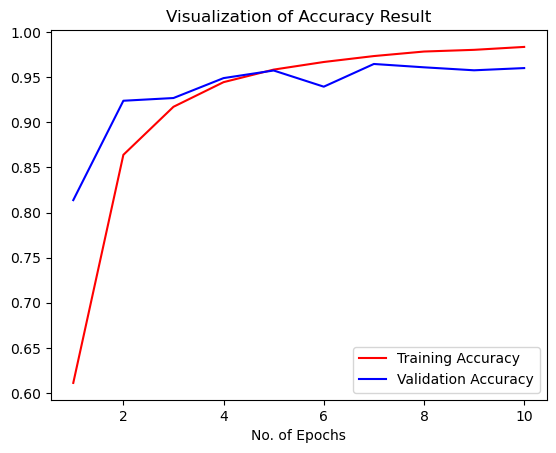

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()